# **<font color = "purple">Sales Prediction</font>**

### **<font color = "green">Import Needed Libraries</font>**

In [74]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
brijbhushannanda1979_bigmart_sales_data_path = kagglehub.dataset_download('brijbhushannanda1979/bigmart-sales-data')

print('Data source import complete.')

# %% [markdown]
# # **<font color = "purple">Sales Prediction</font>**
#
# ### **<font color = "green">Import Needed Libraries</font>**
# %%
!pip install dask[dataframe]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')
# %% [markdown]
# ### **<font color = "green">Data Collection and Processing</font>**
# %%
#Read the data
# Updated path to access the downloaded dataset
df_train = pd.read_csv(brijbhushannanda1979_bigmart_sales_data_path + '/Train.csv')
# %%
#See first 10 rows
df_train.head(10)
# %%
#print number of rows and columns separately

print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

# %%
#see dataset information
df_train.info()

Data source import complete.
Number of Rows: 8523
Number of Features: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object

### **<font color = "green">Data Collection and Processing</font>**

In [75]:
#Read the data
# Use the path returned by kagglehub.dataset_download
df_train = pd.read_csv(brijbhushannanda1979_bigmart_sales_data_path + '/Train.csv')

In [76]:
#See first 10 rows
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,Regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61
6,FDO10,13.65,Regular,0.01,Snack Foods,57.66,OUT013,1987,High,Tier 3,Supermarket Type1,343.55
7,FDP10,NaN,Low Fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.20,Regular,0.02,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.60
9,FDU28,19.20,Regular,0.09,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.53


In [77]:
#print number of rows and columns separately

print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])


Number of Rows: 8523
Number of Features: 12


In [78]:
#see dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Numerical Features:**
- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year
- Item_Outlet_Sales

-------------------------------------------------------------------------------------

**Categorical Features:**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

-------------------------------------------------------------------------------------
**Columns that have null values:**
- Item_Weight
- Outlet_Size

In [79]:
#Check for missing values
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


### **<font color = "green">Handling Missing Values</font>**

> ### **<font color = "brown">Mean Method to handle Missing Values in Item_Weight</font>**

In [80]:
#Calculate Mean of Item_Weight column
df_train['Item_Weight'].mean()

12.857645184135976

In [81]:
#Fill missing values in Item_Weight column with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [82]:
#Check for missing values
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


### **<font color = "green">Handling Missing Values</font>**

> ### **<font color = "brown">Mode Method to handle Missing Values in Outlet_Size </font>**

In [83]:
df_train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [84]:
#Calculate mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [85]:
#Fill missing values in Outlet_Size column with mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [86]:
#Check for missing values
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### **<font color = "green">Data Analysis </font>**

In [87]:
#See descriptive statistics of numerical columns
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


### **<font color = "green">Data Visualization of Numerical Features</font>**

In [88]:
#applying Seaborn's default aesthetic settings to your plots
sns.set()

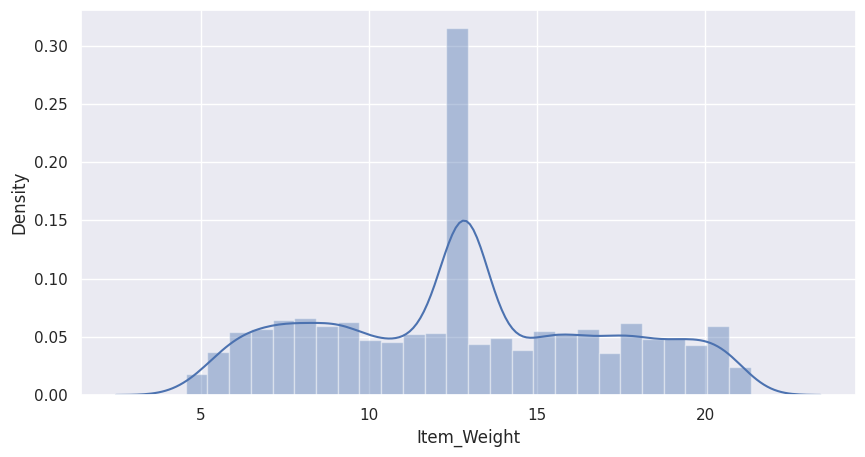

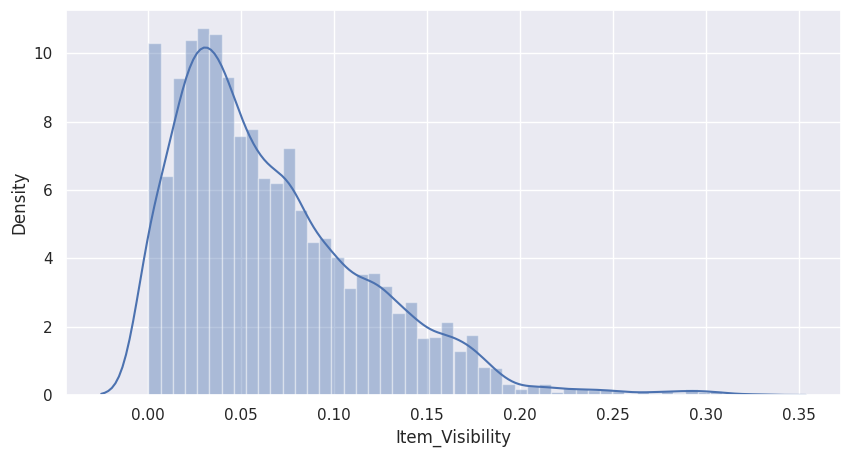

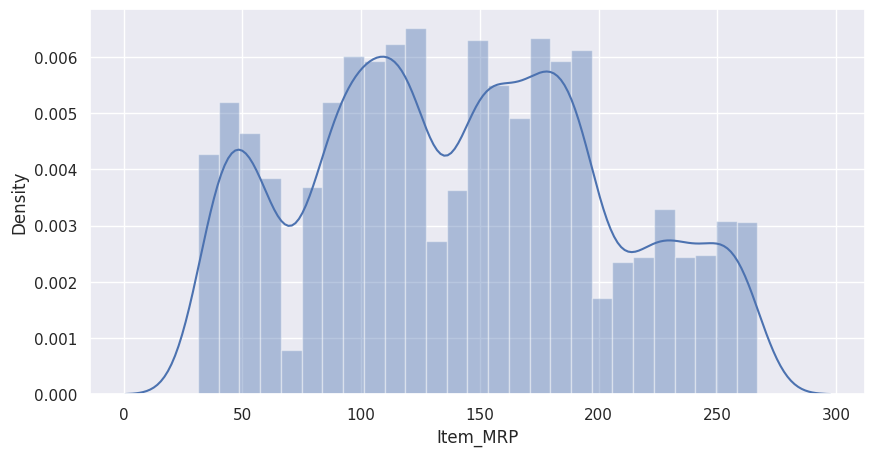

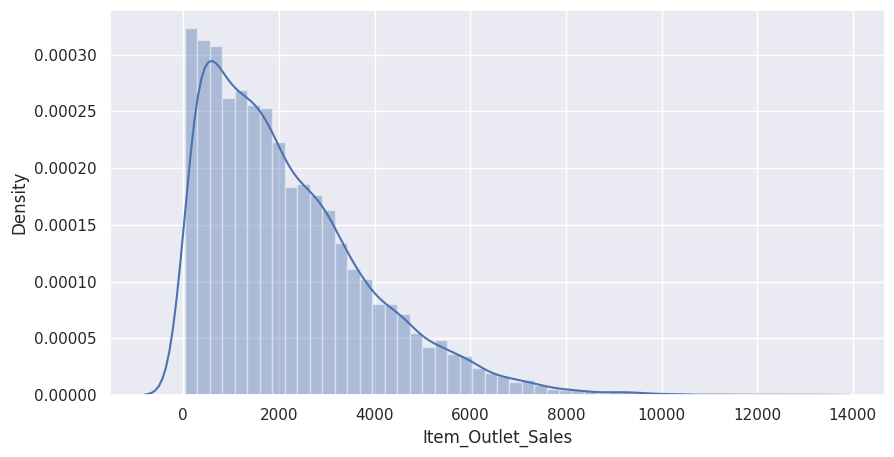

In [89]:
#Plot distplot for numerical columns
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df_train[col])
    plt.show()

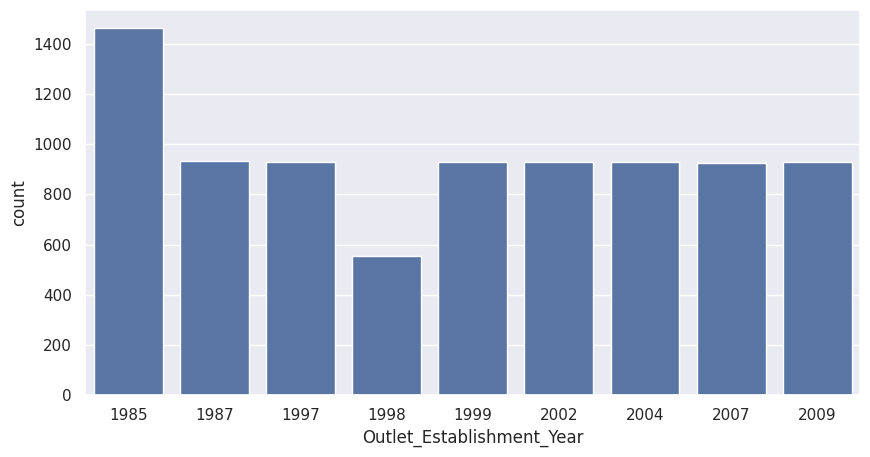

In [90]:
#Plot countplot for Outlet_Establishment_Year column
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

### **<font color = "green">Data Visualization of Categorical Features</font>**

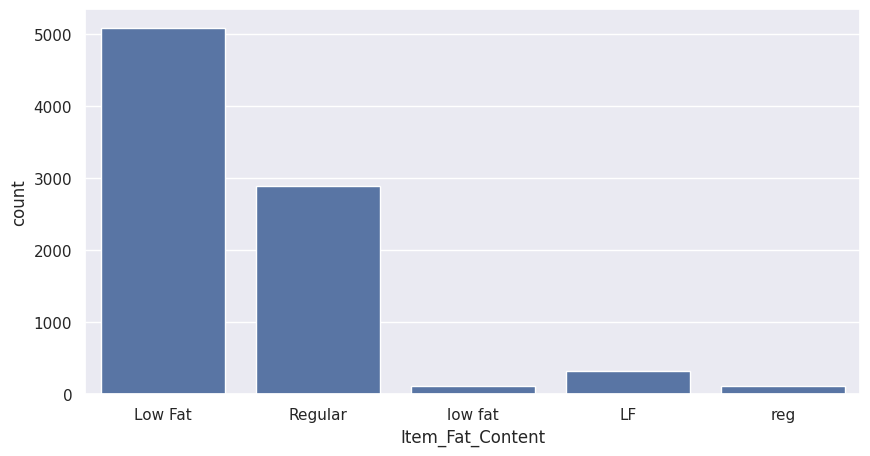

In [91]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=df_train)
plt.show()

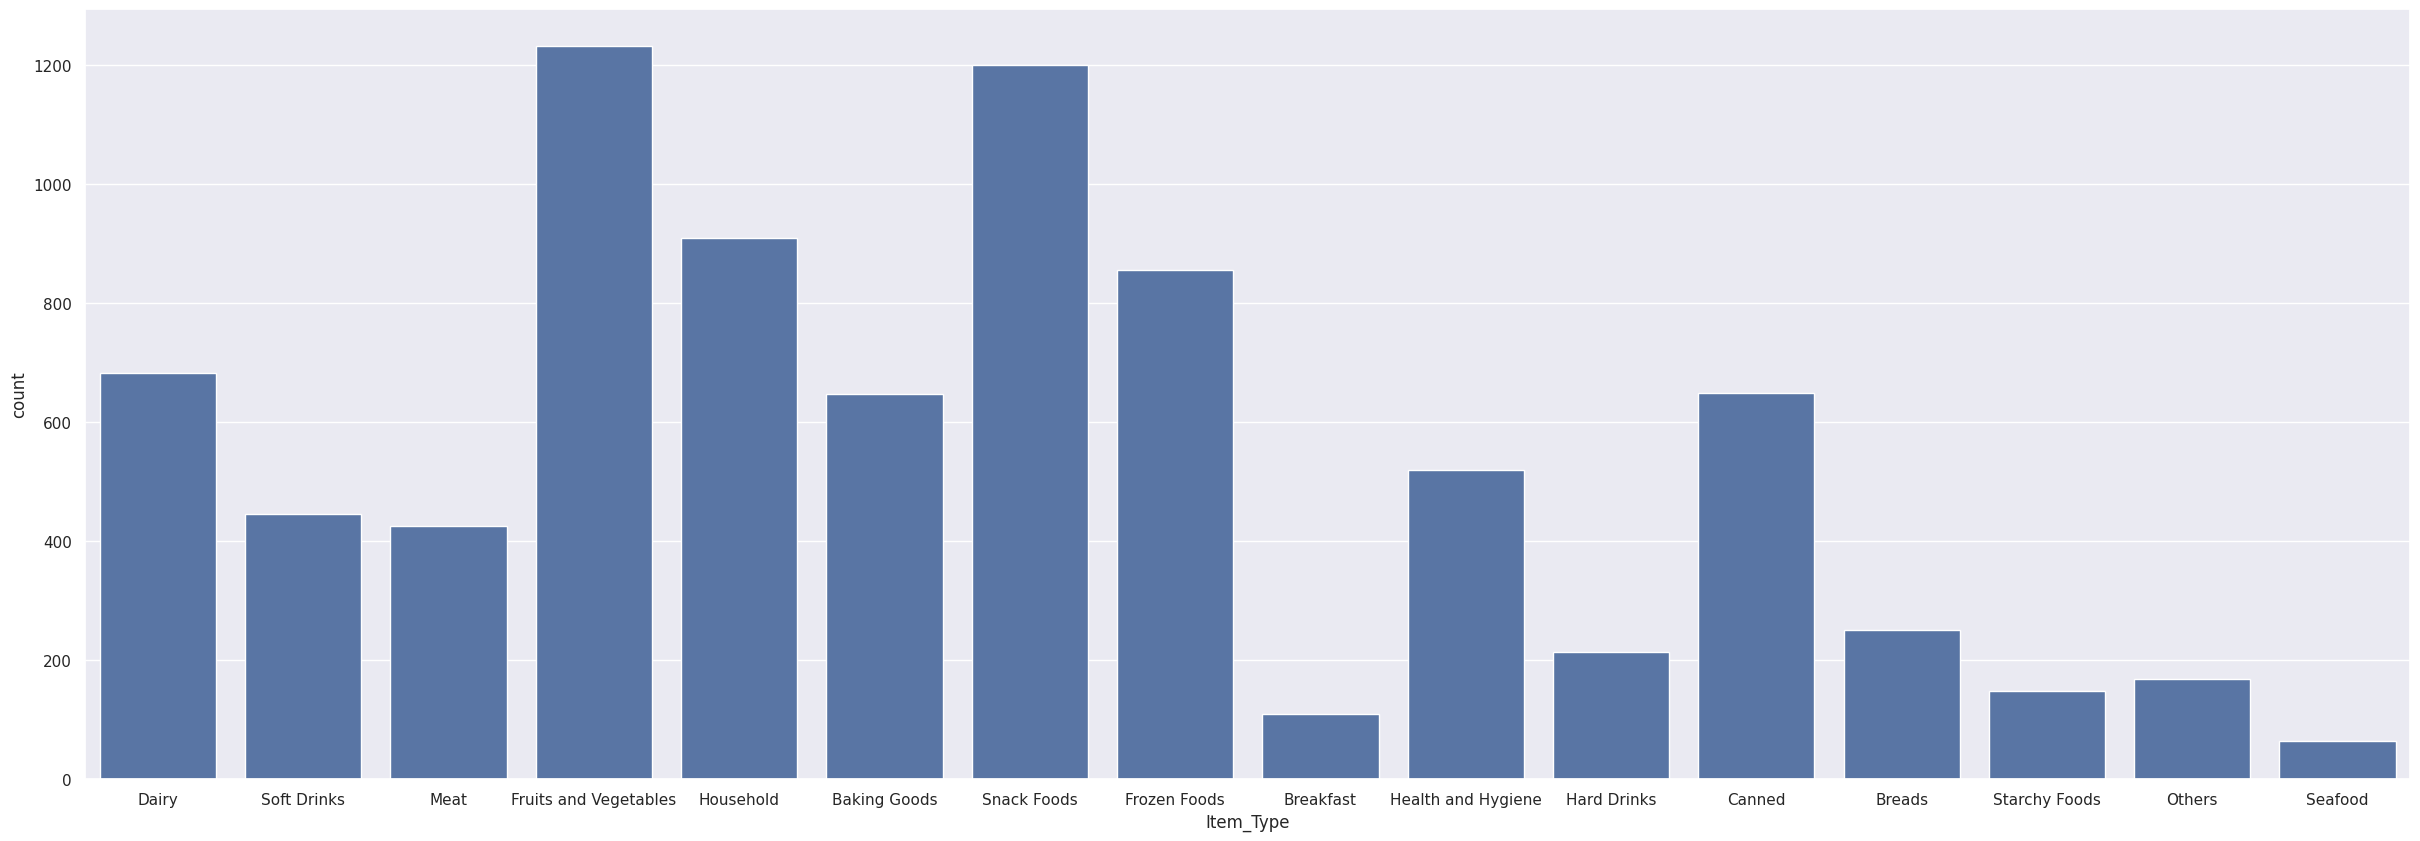

In [92]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=df_train)
plt.show()

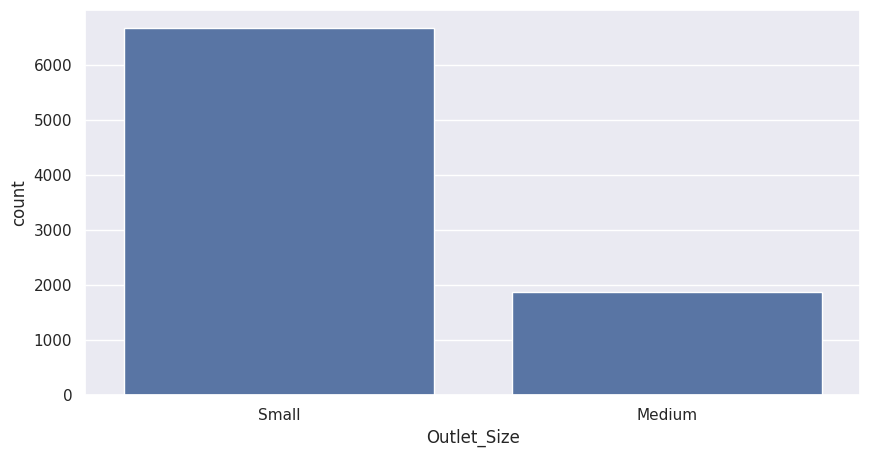

In [93]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()

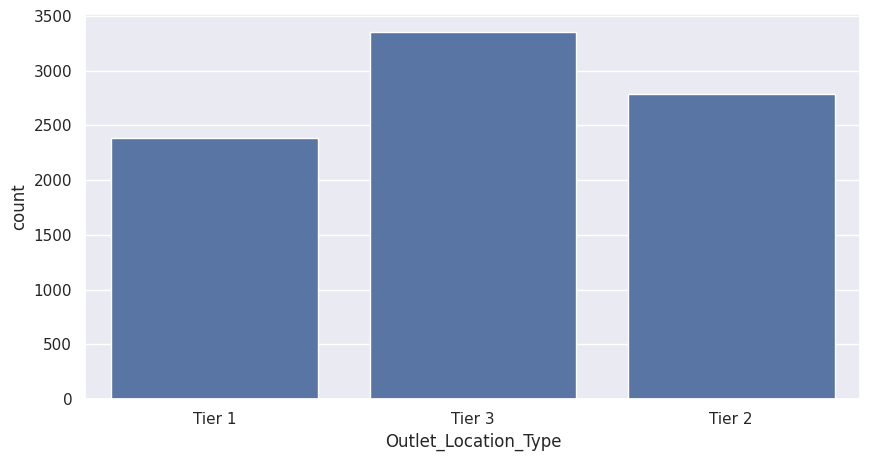

In [94]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

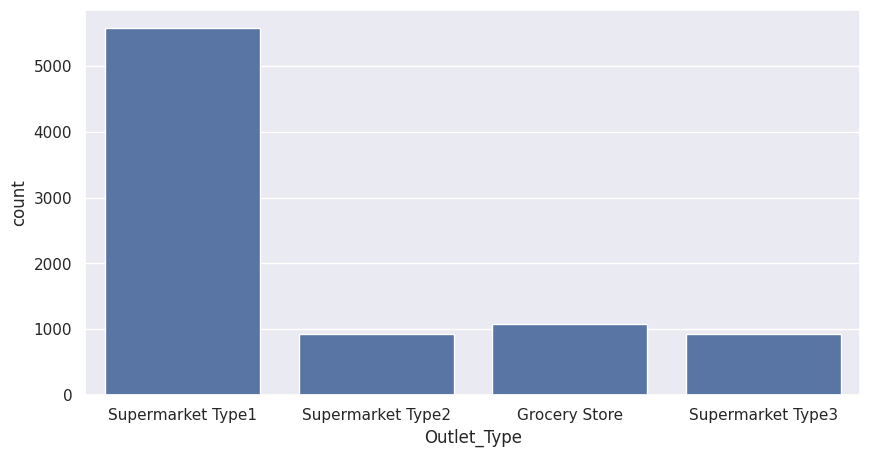

In [95]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

### **<font color = "green">Data Preprocessing</font>**

In [96]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [97]:
#handle Item_Fat_Content column categories with replacement
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)


In [98]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


### **<font color = "green">Handle Categorical Features</font>**

In [99]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])

df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [100]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.02,4,249.81,9,1999,1,0,1,3735.14
1,8,5.92,1,0.02,14,48.27,3,2009,0,2,2,443.42
2,662,17.50,0,0.02,10,141.62,9,1999,1,0,1,2097.27
3,1121,19.20,1,0.00,6,182.09,0,1998,1,2,0,732.38
4,1297,8.93,0,0.00,9,53.86,1,1987,1,2,1,994.71
5,758,10.39,1,0.00,0,51.40,3,2009,0,2,2,556.61
6,696,13.65,1,0.01,13,57.66,1,1987,1,2,1,343.55
7,738,12.86,0,0.13,13,107.76,5,1985,0,2,3,4022.76
8,440,16.20,1,0.02,5,96.97,7,2002,1,1,1,1076.60
9,990,19.20,1,0.09,5,187.82,2,2007,1,1,1,4710.53


from matplotlib import pyplot as plt
_df_12['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Item_Fat_Content'].plot(kind='hist', bins=20, title='Item_Fat_Content')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Item_Identifier', y='Item_Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Item_Weight', y='Item_Fat_Content', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Item_Fat_Content', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Item_Visibility', y='Item_Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Item_Fat_Content'].plot(kind='line', figsize=(8, 4), title='Item_Fat_Content')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


### **<font color = "green">Data Scaling using StandardScaler</font>**

In [102]:
sc = StandardScaler()

df_train['Item_Weight'] = sc.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))

df_train['Item_Visibility'] = sc.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))

df_train['Item_MRP'] = sc.fit_transform(df_train['Item_MRP'].values.reshape(-1,1))

df_train['Item_Outlet_Sales'] = sc.fit_transform(df_train['Item_Outlet_Sales'].values.reshape(-1,1))

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.84,0,-0.97,4,1.75,9,1999,1,0,1,0.91
1,8,-1.64,1,-0.91,14,-1.49,3,2009,0,2,2,-1.02
2,662,1.10,0,-0.96,10,0.01,9,1999,1,0,1,-0.05
3,1121,1.50,1,-1.28,6,0.66,0,1998,1,2,0,-0.85
4,1297,-0.93,0,-1.28,9,-1.40,1,1987,1,2,1,-0.70
5,758,-0.58,1,-1.28,0,-1.44,3,2009,0,2,2,-0.95
6,696,0.19,1,-1.03,13,-1.34,1,1987,1,2,1,-1.08
7,738,0.00,0,1.19,13,-0.53,5,1985,0,2,3,1.08
8,440,0.79,1,-0.96,5,-0.71,7,2002,1,1,1,-0.65
9,990,1.50,1,0.55,5,0.75,2,2007,1,1,1,1.48


from matplotlib import pyplot as plt
_df_24['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Item_Fat_Content'].plot(kind='hist', bins=20, title='Item_Fat_Content')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Item_Identifier', y='Item_Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Item_Weight', y='Item_Fat_Content', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Item_Fat_Content', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Item_Visibility', y='Item_Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Item_Fat_Content'].plot(kind='line', figsize=(8, 4), title='Item_Fat_Content')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

### **<font color = "green">Seperate Features from Label</font>**

In [103]:
#sepertate features and target

Features = df_train.drop(columns=['Item_Outlet_Sales'])

Target = df_train['Item_Outlet_Sales']

In [104]:
Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.84,0,-0.97,4,1.75,9,1999,1,0,1
1,8,-1.64,1,-0.91,14,-1.49,3,2009,0,2,2
2,662,1.10,0,-0.96,10,0.01,9,1999,1,0,1
3,1121,1.50,1,-1.28,6,0.66,0,1998,1,2,0
4,1297,-0.93,0,-1.28,9,-1.40,1,1987,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.42,0,-0.18,13,1.18,1,1987,1,2,1
8519,897,-1.06,1,-0.37,0,-0.53,7,2002,1,1,1
8520,1357,-0.53,0,-0.60,8,-0.90,6,2004,1,1,1
8521,681,-1.34,1,1.53,13,-0.61,3,2009,0,2,2


from matplotlib import pyplot as plt
Features['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Fat_Content'].plot(kind='hist', bins=20, title='Item_Fat_Content')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features.plot(kind='scatter', x='Item_Identifier', y='Item_Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features.plot(kind='scatter', x='Item_Weight', y='Item_Fat_Content', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features.plot(kind='scatter', x='Item_Fat_Content', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features.plot(kind='scatter', x='Item_Visibility', y='Item_Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Fat_Content'].plot(kind='line', figsize=(8, 4), title='Item_Fat_Content')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Features['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

In [105]:
Target

,Item_Outlet_Sales
0,0.91
1,-1.02
2,-0.05
3,-0.85
4,-0.70
...,...
8518,0.35
8519,-0.96
8520,-0.58
8521,-0.20


### **<font color = "green">Split data into train and test sets</font>**

In [106]:
#splittting data into training and testing data
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [107]:
#print shape of features and training and testing data of features
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (8523, 11)
Shape of Features_train: (6818, 11)
Shape of Features_test: (1705, 11)


In [108]:
#print shape of Target and training and testing data of Target
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (8523,)
Shape of Target_train: (6818,)
Shape of Target_test: (1705,)


### **<font color = "green">Building Model</font>**

#### **<font color = "purple">Building  XGBRegressor Model</font>**

In [109]:
#build model with XGBRegressor
XGBRModel = XGBRegressor()

#fit the model
XGBRModel.fit(Features_train,Target_train)

#predict the model
Target_pred = XGBRModel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


R-Squared: 0.5119126417237851
Mean Absolute Error: 0.47173654608004656
Mean Squared Error: 0.45559693922553346


#### **<font color = "purple">Building  SVR Model</font>**

In [110]:
#build model with SVLRegressor
model = SVR()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: -0.024447002815127128
Mean Absolute Error: 0.7432809334031226
Mean Squared Error: 0.9562528325456281


#### **<font color = "purple">Building RandomForestRegressor Model</font>**

In [111]:
#build model with RandomForestRegressor
model = RandomForestRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


R-Squared: 0.5563238828216486
Mean Absolute Error: 0.4483810925560828
Mean Squared Error: 0.4141420128311002


In [112]:
!pip install lazypredict
#Build Lazy Predict Model
from lazypredict.Supervised import LazyRegressor

#Build Lazy Predict Model
reg = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions = reg.fit(Features_train,Features_test,Target_train,Target_test)

#Print model performance
print(models)

 21%|██▏       | 9/42 [00:07<00:40,  1.21s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 71%|███████▏  | 30/42 [00:50<00:13,  1.14s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


 98%|█████████▊| 41/42 [01:03<00:00,  1.05it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 0.012351


100%|██████████| 42/42 [01:03<00:00,  1.51s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.61       0.61  0.60        4.89
SVR                                          0.61       0.61  0.60        4.06
MLPRegressor                                 0.61       0.61  0.61        5.02
GradientBoostingRegressor                    0.60       0.60  0.61        1.55
LGBMRegressor                                0.59       0.59  0.62        0.29
HistGradientBoostingRegressor                0.58       0.59  0.62        0.63
Lars                                         0.58       0.58  0.63        0.03
LarsCV                                       0.58       0.58  0.63        0.07
LassoLarsIC                                  0.58       0.58  0.63        0.04
LinearRegression                             0.58       0.58  0.63        0.06
TransformedTargetRegressor                   0.58   

In [113]:
#build model with GradientBoostingRegressor
model = GradientBoostingRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.6032164241454188
Mean Absolute Error: 0.42493915248696845
Mean Squared Error: 0.37037095845454676


In [114]:
#build model with LGBMRegressor
model = LGBMRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 0.012351
R-Squared: 0.5865680743618109
Mean Absolute Error: 0.43394911824178806
Mean Squared Error: 0.3859110806805262


In [115]:
#Save the model
from joblib import dump
dump(XGBRModel, 'XGBRegressor.joblib')

['XGBRegressor.joblib']

### **<font color = "green">Make a predictive System</font>**

In [116]:
#Read test data
# Replace with the actual path to your Test.csv file
df_test = pd.read_csv(brijbhushannanda1979_bigmart_sales_data_path + '/Test.csv')
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.80,Regular,0.06,Fruits and Vegetables,117.15,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.35,Regular,0.08,Baking Goods,50.10,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.02,Baking Goods,81.06,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.30,Regular,0.12,Snack Foods,95.74,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.99,Low Fat,0.01,Baking Goods,186.89,OUT017,2007,NaN,Tier 2,Supermarket Type1


from matplotlib import pyplot as plt
_df_36['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Item_MRP'].plot(kind='hist', bins=20, title='Item_MRP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Outlet_Establishment_Year'].plot(kind='hist', bins=20, title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_40.groupby('Item_Fat_Content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_41.groupby('Item_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_42.groupby('Outlet_Identifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_43.groupby('Outlet_Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='Item_Weight', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='Item_Visibility', y='Item_MRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x='Item_MRP', y='Outlet_Establishment_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Item_MRP'].plot(kind='line', figsize=(8, 4), title='Item_MRP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Outlet_Establishment_Year'].plot(kind='line', figsize=(8, 4), title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Item_Type'].value_counts()
    for x_label, grp in _df_51.groupby('Item_Fat_Content')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Item_Fat_Content')
_ = plt.ylabel('Item_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outlet_Identifier'].value_counts()
    for x_label, grp in _df_52.groupby('Item_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Item_Type')
_ = plt.ylabel('Outlet_Identifier')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outlet_Size'].value_counts()
    for x_label, grp in _df_53.groupby('Outlet_Identifier')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Outlet_Identifier')
_ = plt.ylabel('Outlet_Size')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outlet_Location_Type'].value_counts()
    for x_label, grp in _df_54.groupby('Outlet_Size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Outlet_Size')
_ = plt.ylabel('Outlet_Location_Type')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['Item_Fat_Content'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Item_Weight', y='Item_Fat_Content', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['Item_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='Item_Weight', y='Item_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_57['Outlet_Identifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_57, x='Item_Weight', y='Outlet_Identifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_58['Outlet_Size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_58, x='Item_Weight', y='Outlet_Size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [117]:
df_test.shape

(5681, 11)

### **<font color = "green">PreProcessing test data</font>**

In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [119]:
#see categories in Item_Fat_Content column
df_test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [120]:
#handle Item_Fat_Content column categories with replacement
df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [121]:
#see categories in Item_Fat_Content column
df_test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


In [122]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_test['Item_Fat_Content'] = le.fit_transform(df_test['Item_Fat_Content'])

df_test['Item_Type'] = le.fit_transform(df_test['Item_Type'])

df_test['Outlet_Size'] = le.fit_transform(df_test['Outlet_Size'])

df_test['Outlet_Location_Type'] = le.fit_transform(df_test['Outlet_Location_Type'])

df_test['Outlet_Type'] = le.fit_transform(df_test['Outlet_Type'])

df_test['Item_Identifier'] = le.fit_transform(df_test['Item_Identifier'])

df_test['Outlet_Identifier'] = le.fit_transform(df_test['Outlet_Identifier'])

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 488.3 KB


In [124]:
sc = StandardScaler()

df_test['Item_Weight'] = sc.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))

df_test['Item_Visibility'] = sc.fit_transform(df_test['Item_Visibility'].values.reshape(-1,1))

df_test['Item_MRP'] = sc.fit_transform(df_test['Item_MRP'].values.reshape(-1,1))

df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.73,0,-1.13,13,-0.54,9,1999,1,0,1
1,1067,-0.94,1,-0.53,4,-0.87,2,2007,3,1,1
2,1406,0.41,0,0.66,11,1.63,0,1998,3,2,0
3,809,-1.15,0,-0.98,13,0.23,2,2007,3,1,1
4,1184,NaN,1,1.03,4,1.51,5,1985,1,2,3
5,461,-0.62,1,-0.04,6,-0.39,8,1997,2,0,1
6,604,1.43,1,0.33,0,-1.47,3,2009,1,2,2
7,266,NaN,0,-0.97,0,-0.97,5,1985,1,2,3
8,668,-1.37,1,1.13,13,-0.73,7,2002,3,1,1
9,170,-1.44,0,-1.17,0,0.74,2,2007,3,1,1


from matplotlib import pyplot as plt
_df_59['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Item_Fat_Content'].plot(kind='hist', bins=20, title='Item_Fat_Content')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63.plot(kind='scatter', x='Item_Identifier', y='Item_Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='Item_Weight', y='Item_Fat_Content', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='Item_Fat_Content', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='Item_Visibility', y='Item_Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Item_Fat_Content'].plot(kind='line', figsize=(8, 4), title='Item_Fat_Content')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

In [125]:
#load trained model
from joblib import load

model = load('XGBRegressor.joblib')

#predict the model
Target_pred = model.predict(df_test)


In [126]:
#print each Item_Identifier with its predicted value and put the result in dataframe
df = pd.DataFrame({'Item_Identifier':df_test['Item_Identifier'],'Item_Outlet_Sales':Target_pred})
df


,Item_Identifier,Item_Outlet_Sales
0,1103,-0.32
1,1067,-0.57
2,1406,-1.09
3,809,0.08
4,1184,3.16
...,...,...
5676,231,0.10
5677,306,-0.16
5678,1412,0.02
5679,517,1.22


from matplotlib import pyplot as plt
df['Item_Identifier'].plot(kind='hist', bins=20, title='Item_Identifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Outlet_Sales'].plot(kind='hist', bins=20, title='Item_Outlet_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Item_Identifier', y='Item_Outlet_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Identifier'].plot(kind='line', figsize=(8, 4), title='Item_Identifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Item_Outlet_Sales'].plot(kind='line', figsize=(8, 4), title='Item_Outlet_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [127]:
from joblib import dump

# Save the trained model to a file
dump(model, 'XGBRegressor.joblib')

['XGBRegressor.joblib']

In [128]:
from joblib import dump
from sklearn.preprocessing import LabelEncoder

# Assuming 'Target' or 'Target_train' contains the labels for training
training_labels = Target  # or Target_train if you want to fit only on training data

# Initialize the label encoder and fit it on the training data
label_encoder = LabelEncoder()
#Fit the label encoder on all the categorical features in your dataset
for col in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    label_encoder.fit(df_train[col])
    df_train[col] = label_encoder.transform(df_train[col])

# Save the LabelEncoder used for categorical encoding
dump(label_encoder, 'label_encoder.joblib')

# Save the StandardScaler used for scaling the features
dump(sc, 'scaler.joblib')

['scaler.joblib']

In [129]:
print(Features_train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
